# Análisis conjunto

In [1]:
import Cleaning_func as Cf
import Transform_func as Tf
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,10)

from scipy.stats import skew

Importamos los datos ya limpiados, con las variables a estudiar por cada persona por cada fecha medida.

In [2]:
filename= 'meditions.pkl'
infile = open(filename,'rb')
meditions = pickle.load(infile)
infile.close()

In [3]:
meditions

,Date,Person,HeartRate,StepCount,Distance,ActiveEnergyBurned,BodyMass
0,2022-06-17,1,69.313901,27860.0,8.139740,254.0,NaN
1,2022-06-18,1,83.613861,15401.0,5.423145,132.0,NaN
2,2022-06-19,1,69.518797,4083.0,1.275480,41.0,NaN
3,2022-06-20,1,76.889831,3172.0,0.934800,35.0,NaN
4,2022-06-21,1,80.778846,11808.0,3.910290,108.0,NaN
...,...,...,...,...,...,...,...
10462,2020-03-07,8,NaN,7582.0,5.606433,NaN,NaN
10463,2020-03-08,8,NaN,8111.0,5.835237,NaN,NaN
10464,2021-08-11,8,NaN,12502.0,9.744899,NaN,NaN
10465,2021-08-12,8,NaN,17478.0,15.329655,NaN,NaN


Sacamos la correlación entre estas variables 

In [4]:
meditions.corr()

,Person,HeartRate,StepCount,Distance,ActiveEnergyBurned,BodyMass
Person,1.000000,0.327130,0.194655,0.285455,0.666969,0.466161
HeartRate,0.327130,1.000000,0.374933,0.310444,0.375722,0.867474
StepCount,0.194655,0.374933,1.000000,0.939542,0.668040,0.082358
Distance,0.285455,0.310444,0.939542,1.000000,0.805621,-0.255304
ActiveEnergyBurned,0.666969,0.375722,0.668040,0.805621,1.000000,0.193827
BodyMass,0.466161,0.867474,0.082358,-0.255304,0.193827,1.000000


<AxesSubplot:>

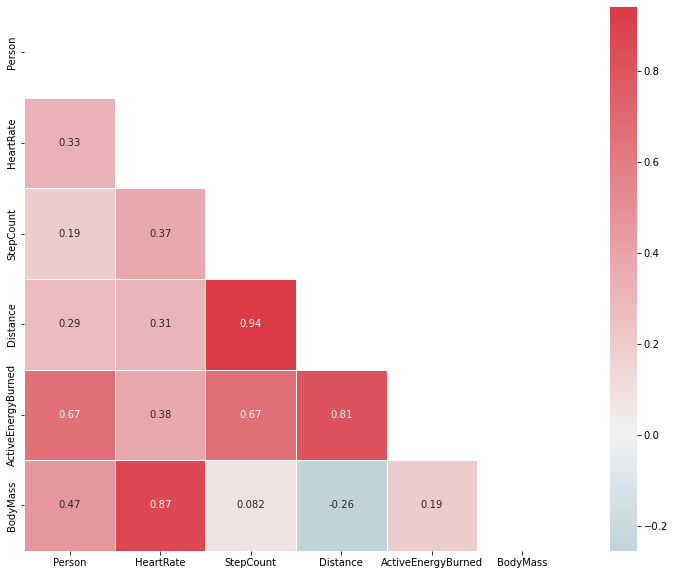

In [45]:
mask = np.triu(np.ones_like(meditions.corr(), dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(meditions.corr(), cmap =cmap, mask= mask, annot=True, center = 0, linewidths=.5, square = True)

Ahora, agregamos los datos de sueño al DataFrame para revisar cómo se relacionan las varibles entre sí

In [11]:
filename= 'sl_comparer.pkl'
infile = open(filename,'rb')
sleep_data = pickle.load(infile)
infile.close()

In [12]:
df_persons = pd.merge(meditions, sleep_data, on = ['Date', 'Person'], how="outer")   
df_persons

,Date,Person,HeartRate,StepCount,Distance,ActiveEnergyBurned,BodyMass,Time_Asleep,Time_in_bed
0,2022-06-17,1,69.313901,27860.0,8.139740,254.0,NaN,NaN,NaN
1,2022-06-18,1,83.613861,15401.0,5.423145,132.0,NaN,NaN,NaN
2,2022-06-19,1,69.518797,4083.0,1.275480,41.0,NaN,NaN,NaN
3,2022-06-20,1,76.889831,3172.0,0.934800,35.0,NaN,NaN,NaN
4,2022-06-21,1,80.778846,11808.0,3.910290,108.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10462,2020-03-07,8,NaN,7582.0,5.606433,NaN,NaN,NaN,NaN
10463,2020-03-08,8,NaN,8111.0,5.835237,NaN,NaN,NaN,NaN
10464,2021-08-11,8,NaN,12502.0,9.744899,NaN,NaN,NaN,NaN
10465,2021-08-12,8,NaN,17478.0,15.329655,NaN,NaN,NaN,NaN


In [16]:
df_persons.corr()

,Person,HeartRate,StepCount,Distance,ActiveEnergyBurned,BodyMass,Time_Asleep,Time_in_bed
Person,1.000000,0.327130,0.194655,0.285455,0.666969,0.466161,0.126995,0.126995
HeartRate,0.327130,1.000000,0.374933,0.310444,0.375722,0.867474,-0.006680,-0.006680
StepCount,0.194655,0.374933,1.000000,0.939542,0.668040,0.082358,-0.016432,-0.016432
Distance,0.285455,0.310444,0.939542,1.000000,0.805621,-0.255304,0.000549,0.000549
ActiveEnergyBurned,0.666969,0.375722,0.668040,0.805621,1.000000,0.193827,-0.002664,-0.002664
BodyMass,0.466161,0.867474,0.082358,-0.255304,0.193827,1.000000,-0.096368,-0.096368
Time_Asleep,0.126995,-0.006680,-0.016432,0.000549,-0.002664,-0.096368,1.000000,1.000000
Time_in_bed,0.126995,-0.006680,-0.016432,0.000549,-0.002664,-0.096368,1.000000,1.000000


<AxesSubplot:>

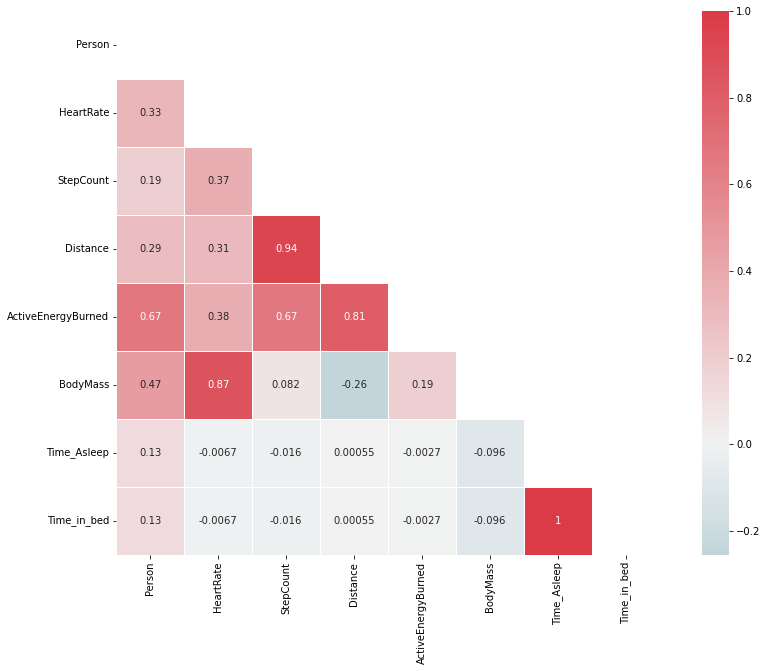

In [47]:
mask = np.triu(np.ones_like(df_persons.corr(), dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_persons.corr(), cmap =cmap, mask= mask, annot=True, center = 0, linewidths=.5, square = True)

In [229]:
# Aplicamos una correlación de Spearman para descartar que haya una relación monótona, no detectada por el índice de correlación de Pearson
df_persons.corr((method='spearman')

,Person,HeartRate,StepCount,Distance,ActiveEnergyBurned,BodyMass,Time_Asleep,Time_in_bed
Person,1.000000,0.329456,0.186287,0.227159,0.652602,0.831542,0.007798,0.007798
HeartRate,0.329456,1.000000,0.309259,0.179270,0.301349,0.831177,-0.021636,-0.021636
StepCount,0.186287,0.309259,1.000000,0.957107,0.724913,0.149706,-0.107464,-0.107464
Distance,0.227159,0.179270,0.957107,1.000000,0.826440,-0.191704,-0.095144,-0.095144
ActiveEnergyBurned,0.652602,0.301349,0.724913,0.826440,1.000000,0.138472,-0.095356,-0.095356
BodyMass,0.831542,0.831177,0.149706,-0.191704,0.138472,1.000000,-0.076336,-0.076336
Time_Asleep,0.007798,-0.021636,-0.107464,-0.095144,-0.095356,-0.076336,1.000000,1.000000
Time_in_bed,0.007798,-0.021636,-0.107464,-0.095144,-0.095356,-0.076336,1.000000,1.000000


<AxesSubplot:>

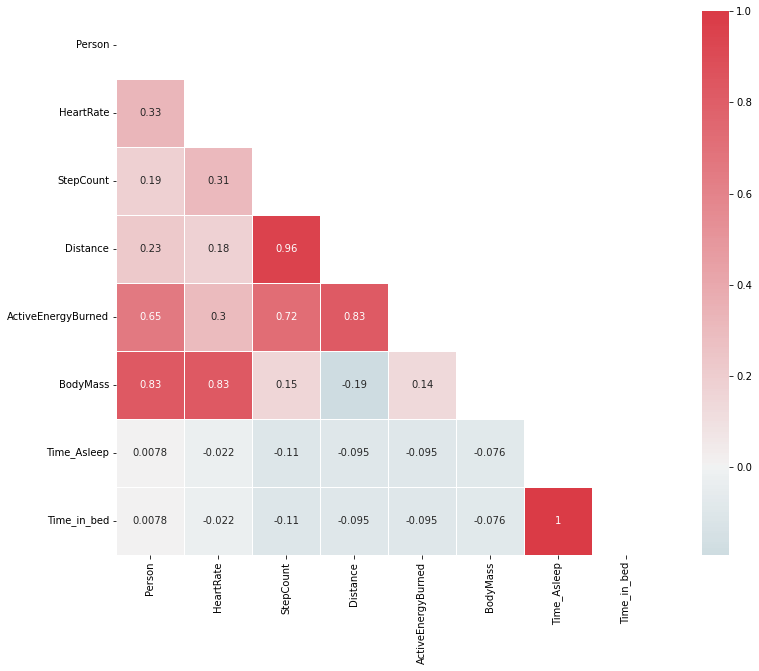

In [231]:
mask = np.triu(np.ones_like(df_persons.corr(method='spearman'), dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_persons.corr(method='spearman'), cmap =cmap, mask= mask, annot=True, center = 0, linewidths=.5, square = True)

`Observaciones`
1. Revisando los datos podemos ver que las variables más correlacionadas son las que miden variables similares como \
tiempo durmiendo y tiempo en la cama (que se relacionan con el sueño) \
y la distancia y la cantidad de pasos.


2. Por segundo lugar está la relación entre Masa corporl y ritmo cardiaco, \
dado que hay pocos valores en masa corporal no podemos afirmar que sea una corewlación de dependencia, pero sí podemos\ suponer que las personas con más masa corporl exigen más a su corazón, lo que explicaría esta correlación. 


3. Le siguen la correlación entre Calorías activamente quemadas y distancia. \
Lo que explica que la mayor cantidad de calorías está relacionada con el movimiento de caminata.


4. Vemos también que el ritmo cardiaco tiene una baja correlación con el resto de las variables, pero tiene una relación muy similar con las calorias quemadas, los pasos y la distancia.


5. También se observa que las variables menos correlacionadas son masa corporal con pasos diarios y tiempo de sueño con \
distancia caminada. 


6. Por último vemos que las variables de sueño tienen poca correlación con el resto de nuestras variables incluidas en la medición. 

## Evolución de las variables con el paso del tiempo

### Pasos

In [50]:
steps_by_date = meditions[['Date','StepCount', 'Person']].dropna()
steps_by_date

,Date,StepCount,Person
0,2022-06-17,27860.0,1
1,2022-06-18,15401.0,1
2,2022-06-19,4083.0,1
3,2022-06-20,3172.0,1
4,2022-06-21,11808.0,1
...,...,...,...
10462,2020-03-07,7582.0,8
10463,2020-03-08,8111.0,8
10464,2021-08-11,12502.0,8
10465,2021-08-12,17478.0,8


<AxesSubplot:xlabel='Date', ylabel='StepCount'>

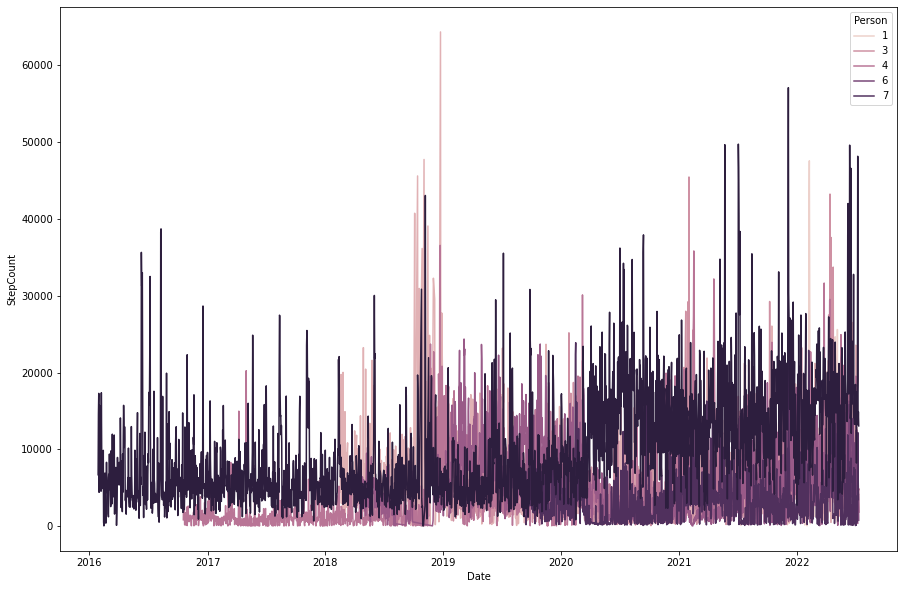

In [67]:
sns.lineplot(x='Date' , y='StepCount' , data=steps_by_date, hue= 'Person')

In [70]:
# Como observamos que la cantidad de datos es dificil de representar gráficamente sin trabajarlos, hacemos 2 variaciones:
# Creamos una media móvil de 30 días para crear una serie de promedios por cada mes y así tener menos picos en la gráfica
# y acortamos el tiempo de medición de 2020 en adelante 

<AxesSubplot:xlabel='Date', ylabel='RollingMeanSteps'>

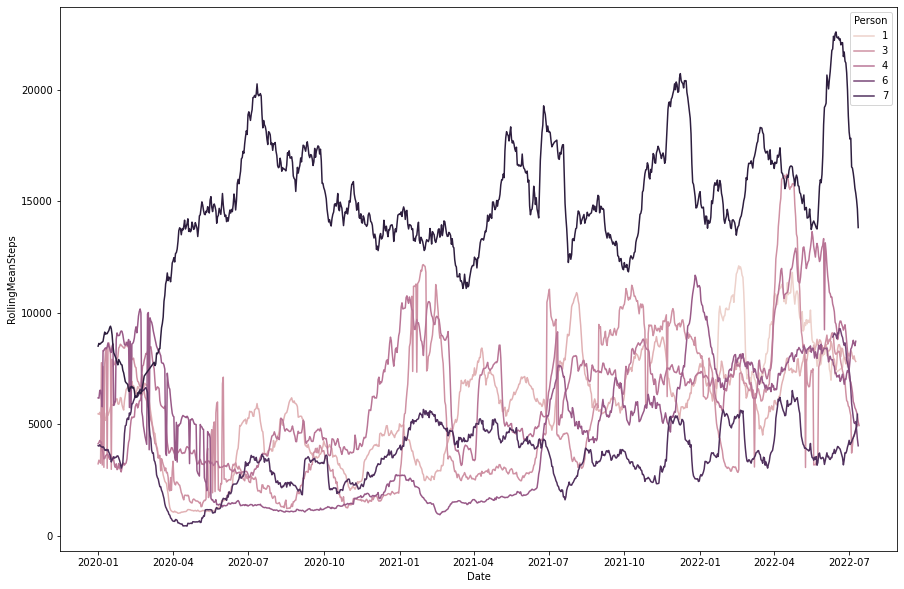

In [207]:
steps_by_date['RollingMeanSteps'] = steps_by_date.StepCount.rolling(window=30, center=True).mean()

sns.lineplot(x='Date' , y='RollingMeanSteps' , data=steps_by_date[steps_by_date['Date'].dt.year > 2019], hue= 'Person')


<AxesSubplot:xlabel='Date', ylabel='RollingMeanSteps'>

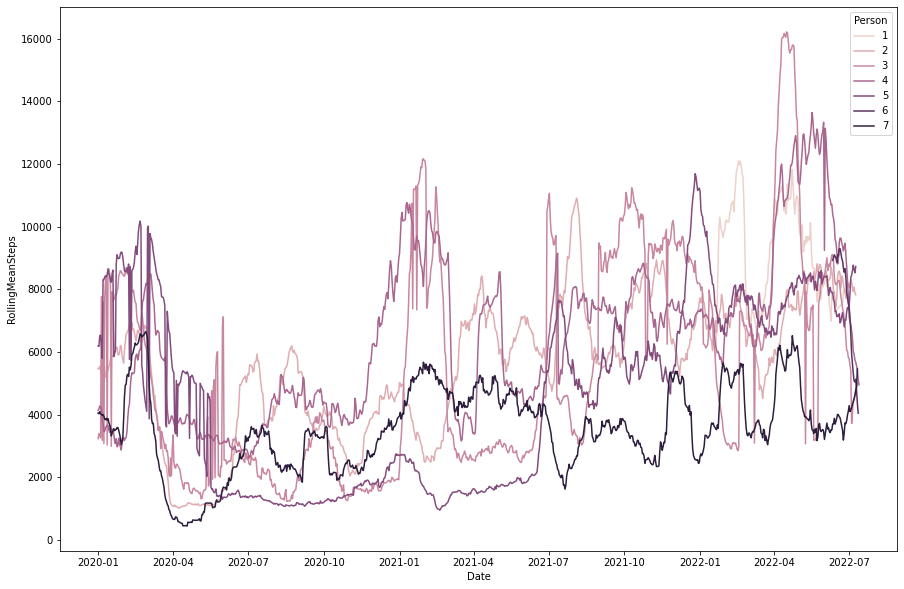

In [72]:
# Como vemos que la person numero 8 tiene un ritmo de pasos mucho más alto que el resto de las personas del estudio,
# la omitimos de la gráfica para observr si hay una tendencia
sns.lineplot(x='Date' , y='RollingMeanSteps' , data=steps_by_date[(steps_by_date['Date'].dt.year > 2019) & (steps_by_date['Person']<8)], hue= 'Person')

`Observaciones`

Observamos una bajada en los pasos durante los meses de cuarentena por el Covid-19 (marzo 2020  a novimbre de 2020). \
De igual forma, notamos que cada individuo pasa por icos y baches de movimiento a lo largo de los meses, sin embargo, sus medias se mantienen en franjas similares.

In [86]:
# Revisamos los datos por día de la semana para identificar algún patrón
steps_by_date['Weekday'] = steps_by_date['Date'].dt.weekday
steps_by_date

,Date,StepCount,Person,RollingMeanSteps,Weekday
0,2022-06-17,27860.0,1,NaN,4
1,2022-06-18,15401.0,1,NaN,5
2,2022-06-19,4083.0,1,NaN,6
3,2022-06-20,3172.0,1,NaN,0
4,2022-06-21,11808.0,1,NaN,1
...,...,...,...,...,...
10462,2020-03-07,7582.0,8,NaN,5
10463,2020-03-08,8111.0,8,NaN,6
10464,2021-08-11,12502.0,8,NaN,2
10465,2021-08-12,17478.0,8,NaN,3


[Text(0.5, 17.200000000000003, 'labels')]

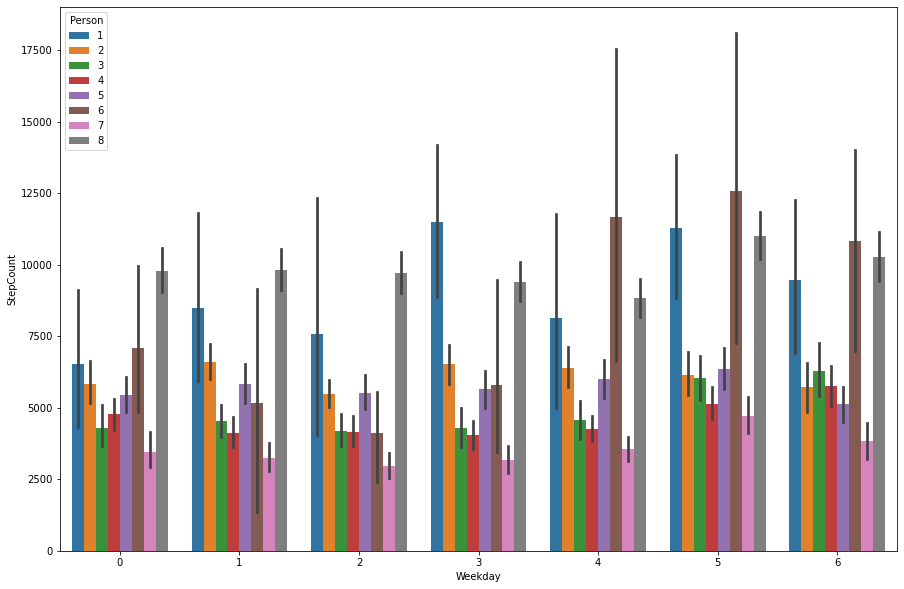

In [144]:
plt.xticks(index, labels)
sns.barplot(x="Weekday", hue="Person", y= 'StepCount', data=steps_by_date, )
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set(xlabel='labels')

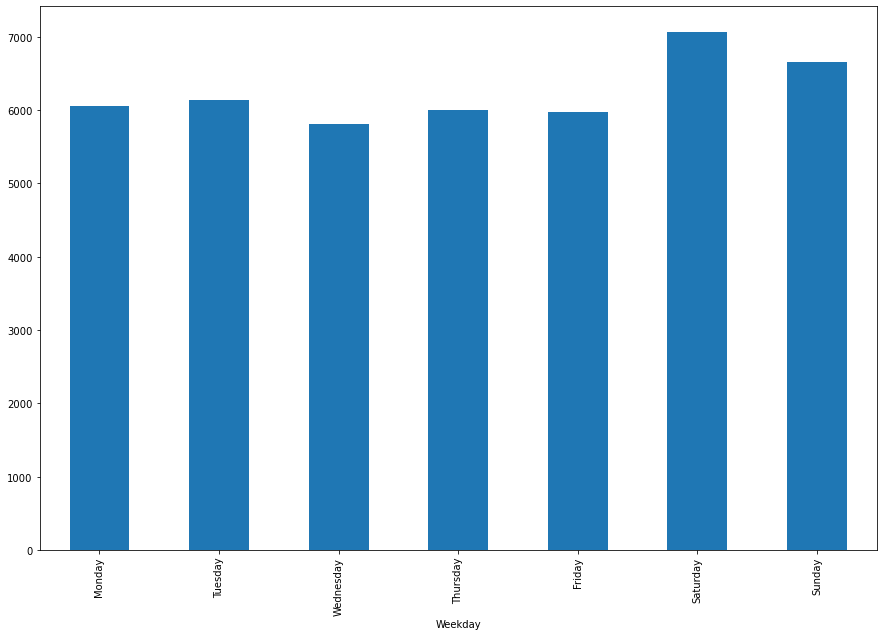

In [123]:
data = steps_by_date.groupby(['Weekday'])['StepCount'].mean()
data.plot(kind='bar', x='day_of_week')
plt.xticks(index, labels)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

<AxesSubplot:xlabel='Person', ylabel='StepCount'>

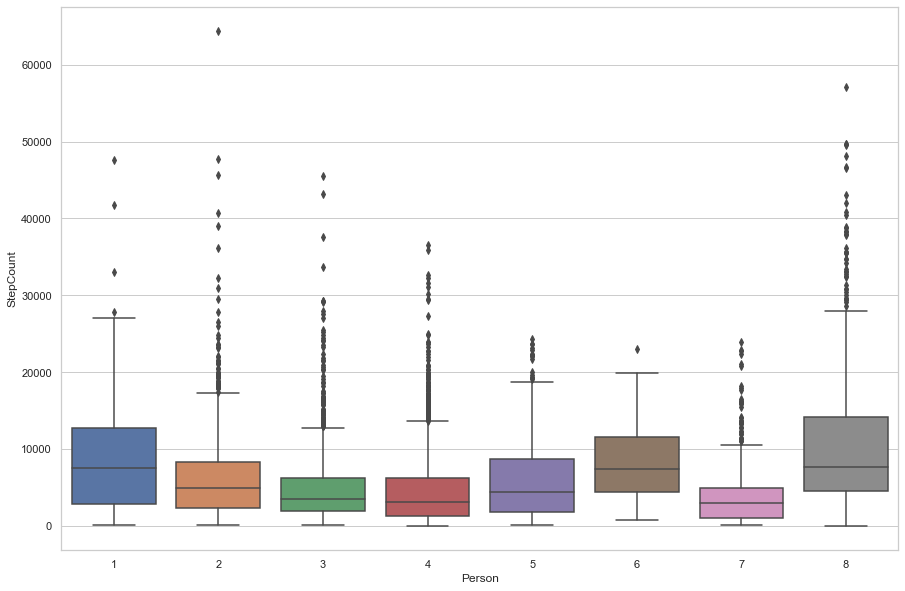

In [263]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="Person", y="StepCount", data=steps_by_date)

`Observaciones`
- Si revisamos la distribución de los pasos de todas las personas del estudio según día de la semn, vemos que el día más activo es el sábado
- El día con media de pasos más bajo es el miércoles, sin embargo, no es demasiada la diferencia con el resto de los días
- Podemos ver que el promedio por persona está debajo de los 10.000 pasos recoemndados por día, sin embargo hay 3 individuos que sí tienen gran cantidad de datos sobre los 10.000 pasos. 
- Todos los individuos tienen outliers sobre los 20.000 pasos, qu podríamos considerar días puntuales de mucha actividad

### Sueño

In [99]:
sleep_data

,Date,Person,Time_Asleep,Time_in_bed
0,2019-01-27,5,6.700000,6.700000
1,2019-01-28,5,8.150000,8.150000
2,2019-01-29,5,6.400000,6.400000
3,2019-01-30,5,4.966667,4.966667
4,2019-01-31,5,3.850000,3.850000
...,...,...,...,...
2082,2022-07-10,8,6.850000,6.850000
2083,2022-07-11,4,7.250000,7.250000
2084,2022-07-11,8,6.283333,6.283333
2085,2022-07-12,4,7.650000,7.650000


<AxesSubplot:xlabel='Date', ylabel='Time_Asleep'>

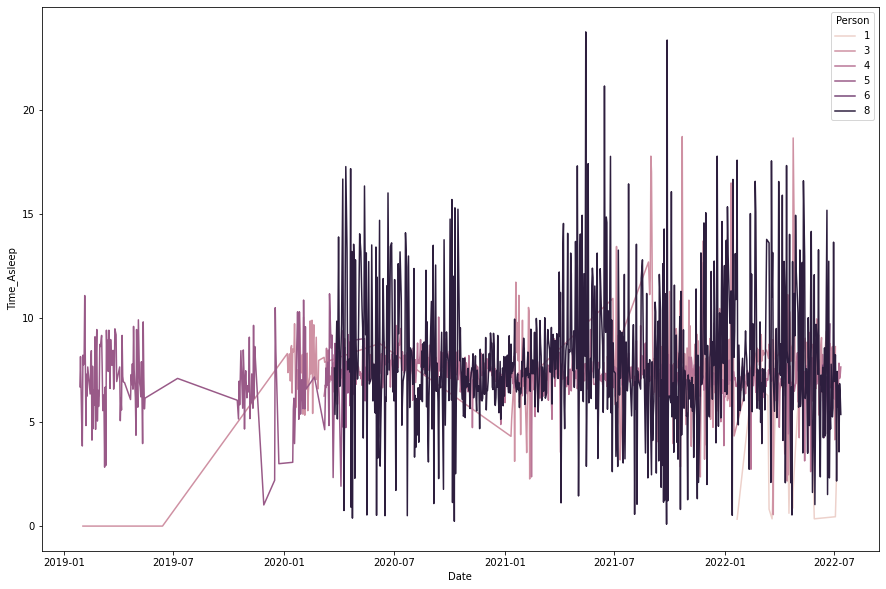

In [217]:
sns.lineplot(x='Date' , y='Time_Asleep' , data=sleep_data, hue= 'Person')

 Para los datos de sueño, realizamos una media móvil del tiempo de sueño por mes, como en la variable anteriror, para visualizar mejor los datos

<AxesSubplot:xlabel='Date', ylabel='RollingMeanSleep'>

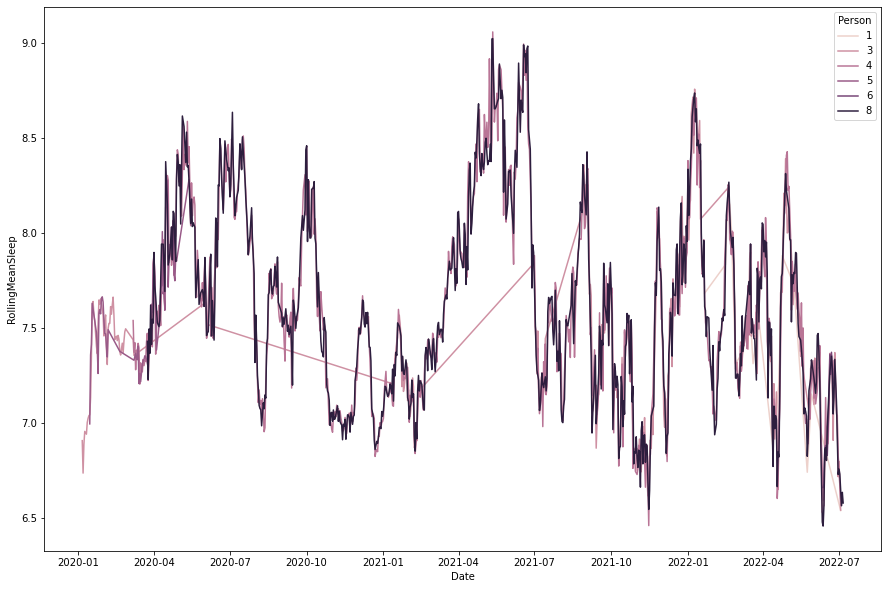

In [226]:
sleep_data['RollingMeanSleep'] = sleep_data.Time_Asleep.rolling(window=30, center=True).mean()
sns.lineplot(x='Date' , y='RollingMeanSleep' , data=sleep_data[sleep_data['Date'].dt.year > 2019], hue= 'Person')

<AxesSubplot:xlabel='Date', ylabel='Time_Asleep'>

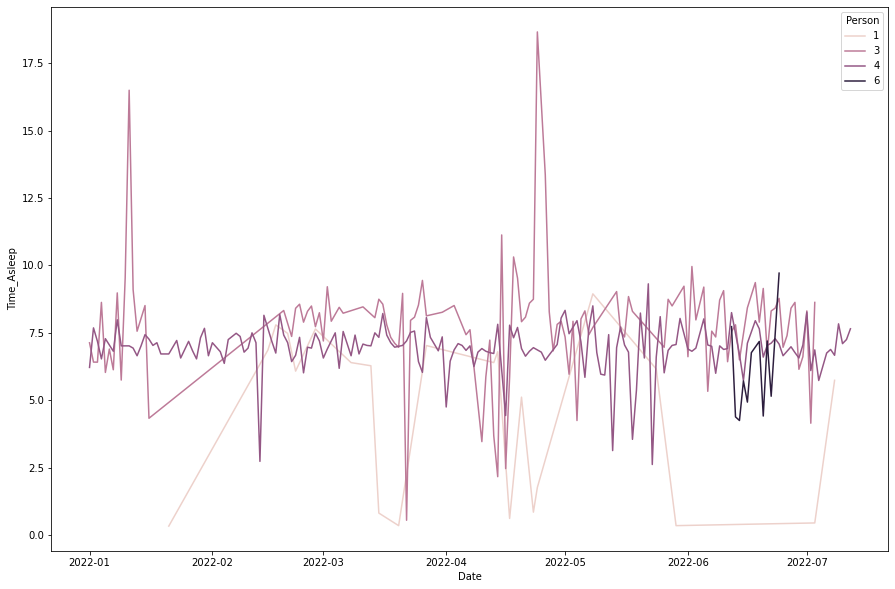

In [228]:
# Para una visualización más clara, visulizaos oslo datos de 2022 y sin el indiviuo 8, que domina la gráficas po la cantidad de los datos
sns.lineplot(x='Date' , y='Time_Asleep' , data=sleep_data[(sleep_data['Date'].dt.year > 2021)  & (sleep_data['Person']<8)], hue= 'Person')

In [128]:
sleep_data['Weekday'] = sleep_data['Date'].dt.weekday

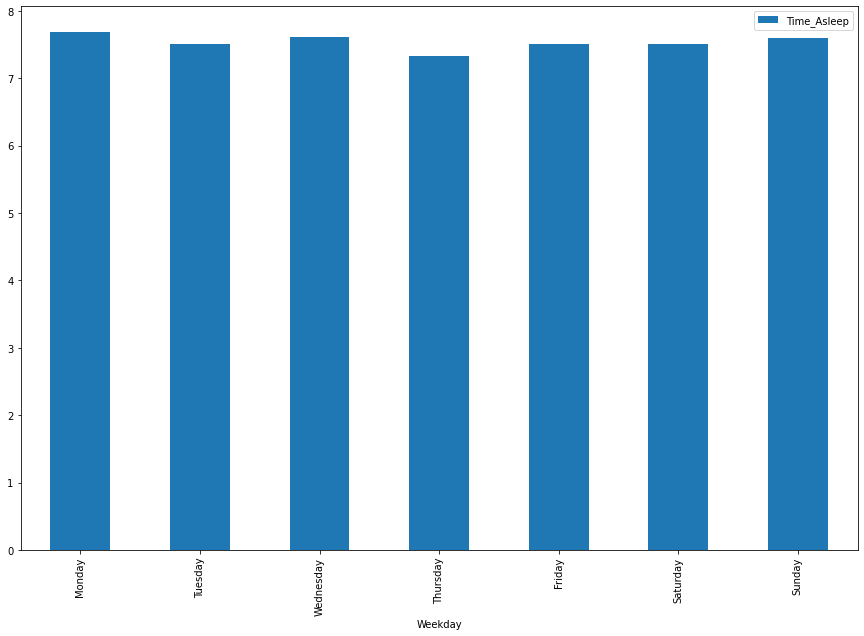

In [132]:
data = sleep_data.groupby(['Weekday']).agg({'Time_Asleep':'mean'})
data.plot(kind='bar')
plt.xticks(index, labels)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [213]:
data

,Time_Asleep
Weekday,
0,7.681432
1,7.505640
2,7.616267
3,7.323601
4,7.513412
5,7.513837
6,7.598141


In [127]:
sleep_data.groupby(['Person', 'Weekday']).agg({'Time_Asleep':'mean'})

Time_Asleep
Person Weekday             
1      1           5.261889
       2           5.755556
       3           7.295417
       4           3.036111
       5           0.849722
       6           4.090778
3      0           7.806718
       1           8.166956
       2           7.585932
       3           7.382222
       4           8.068717
       5           7.254207
       6           7.344624
4      0           7.320228
       1           7.259211
       2           7.299697
       3           7.184181
       4           7.223394
       5           7.247222
       6           7.580374
5      0           7.201852
       1           7.116000
       2           6.919136
       3           6.942708
       4           7.223718
       5           6.648000
       6           6.896377
6      0           4.398472
       1           5.723889
       2           5.431944
       3           4.930833
       4           8.238889
       6           7.455556
8      0           8.223624
       1           7.694535
       2           8.206841
       3           7.583783
       4           7.725249
       5           8.220305
       6           8.195706

[Text(0.5, 17.200000000000003, 'labels')]

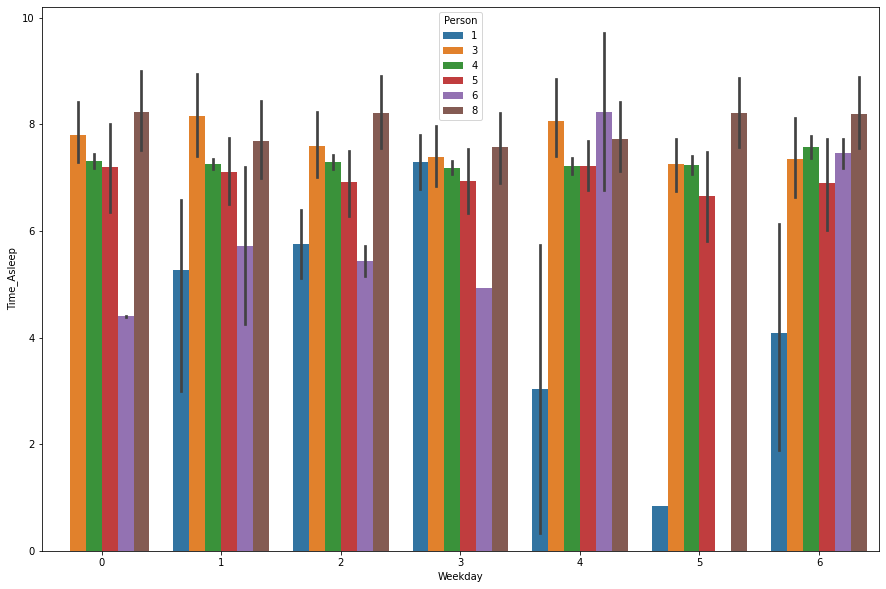

In [149]:
plt.xticks(index, labels)
sns.barplot(x="Weekday", hue="Person", y= 'Time_Asleep', data=sleep_data)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Para entender mejor la distribución anteror, usamos un diagrama de caja por día de la semana

<AxesSubplot:xlabel='Weekday', ylabel='Time_Asleep'>

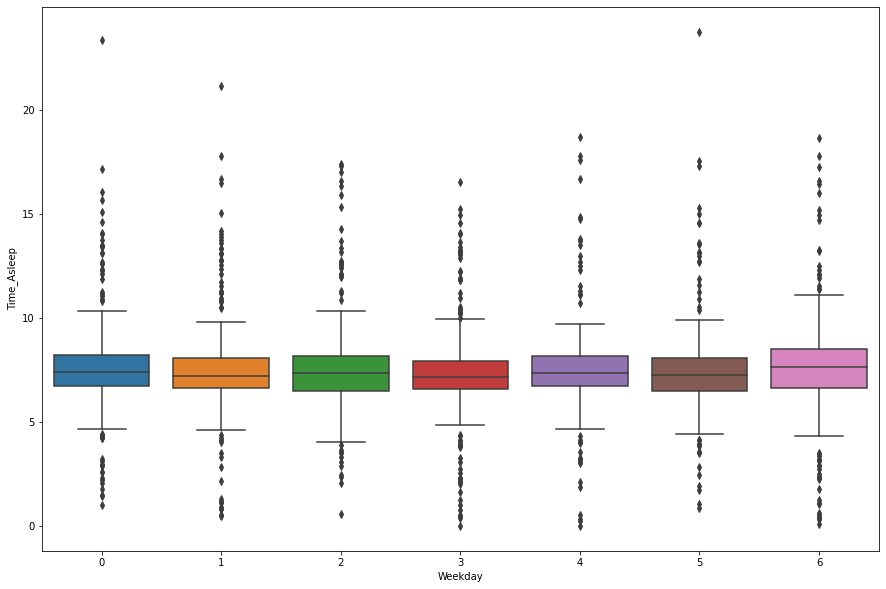

In [256]:
sns.boxplot(x='Weekday', y="Time_Asleep", data=sleep_data)

In [262]:
# Vemos que los días tienen una distribución muy similar 

<AxesSubplot:xlabel='Person', ylabel='Time_Asleep'>

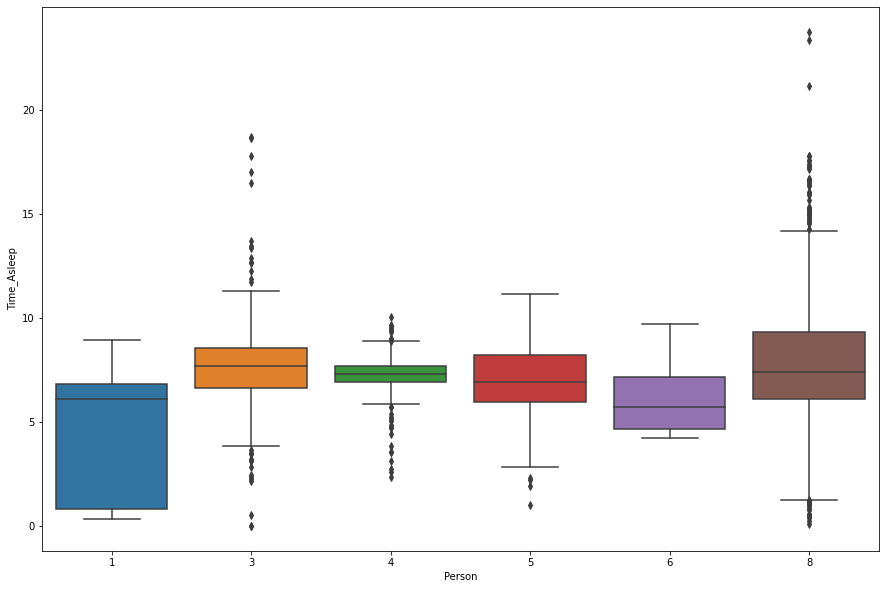

In [259]:
#Ahora usamos otro diagrama de caja comparar la distribuciónd e las horaa de sueño por persona
sns.boxplot(x="Person", y="Time_Asleep", data=sleep_data)

In [266]:
#Comprobamos los datos anteriores, haciendo un "describe" para visualizar mejor la distribución del sueño de cada persona
sleep_data.groupby('Person').describe()

Time_Asleep                                                    \
             count      mean       std       min       25%       50%   
Person                                                                 
1             22.0  4.556414  3.099357  0.333056  0.824514  6.119583   
3            337.0  7.651321  2.339714  0.000000  6.628611  7.681944   
4            795.0  7.299161  0.782585  2.366667  6.933333  7.300000   
5            185.0  6.994414  1.806582  1.016667  5.983333  6.933333   
6             11.0  6.129848  1.736663  4.249167  4.672639  5.715556   
8            737.0  7.980348  3.469933  0.091667  6.116667  7.400000   

                            Time_in_bed            ... RollingMeanSleep  \
             75%        max       count      mean  ...              75%   
Person                                             ...                    
1       6.843333   8.946667        22.0  4.556414  ...         7.766565   
3       8.563056  18.728333       337.0  7.651321  ...         7.653257   
4       7.716667  10.050000       795.0  7.299161  ...         7.970694   
5       8.216667  11.166667       185.0  6.994414  ...         7.475569   
6       7.189444   9.713611        11.0  6.129848  ...         7.233667   
8       9.350000  23.758333       737.0  7.980348  ...         7.974296   

                 Weekday                                               
             max   count      mean       std  min  25%  50%  75%  max  
Person                                                                 
1       8.151769    22.0  4.000000  2.138090  1.0  2.0  4.5  6.0  6.0  
3       8.755630   337.0  3.062315  1.987829  0.0  1.0  3.0  5.0  6.0  
4       9.056389   795.0  2.976101  1.998282  0.0  1.0  3.0  5.0  6.0  
5       8.281657   185.0  2.929730  1.953378  0.0  1.0  3.0  5.0  6.0  
6       7.372546    11.0  2.636364  2.157440  0.0  1.0  2.0  4.0  6.0  
8       9.021111   737.0  3.004071  2.011849  0.0  1.0  3.0  5.0  6.0  

[6 rows x 32 columns]

`Observaciones`

- Al observar la evolución del tiempo de sueño en el tiempo vemos que de forma general existen picos altos y bajos de sueño, sin embargo, si observamos los datos están siempre entre 6,5 y 9 horas en promedio lo que es un rango saludable
- Al observar solo los datos de 2022, podemos notar que la media de horas se ubica entre 7 y 8 horas para los ondividuos estudiados
- En cuanto a la distribución por día de la semana, vemos que los jueves son los días de menos horas duermiendo, mientras que los lunes son los días con más hora de sueño
- Cuando vemos la distribución de datos por individuo en el digrama de caja podemos identificar que la persona 1 es la que menos duerme, junto con la persona 6 que a pesar que siempre duerme una cantidad de horas similar, es quien tiene la media de horas de sueño más baja.
- Las personas 3 y 8 son las que presentan más variabilidad del sueño, pues se identifican muchos outliers a ambos ldos de la caja representando días "sueltos" en los que duermen mucho o muy poco. 
- Por la distribución de los datos, podríamos decir que los días con más de 20 horas de sueo o casi 0 horas de sueño pueden deberse a error en la recolección de datos (persona 1, con muchos datos cercanos a 0).

### Ritmo cardiaco

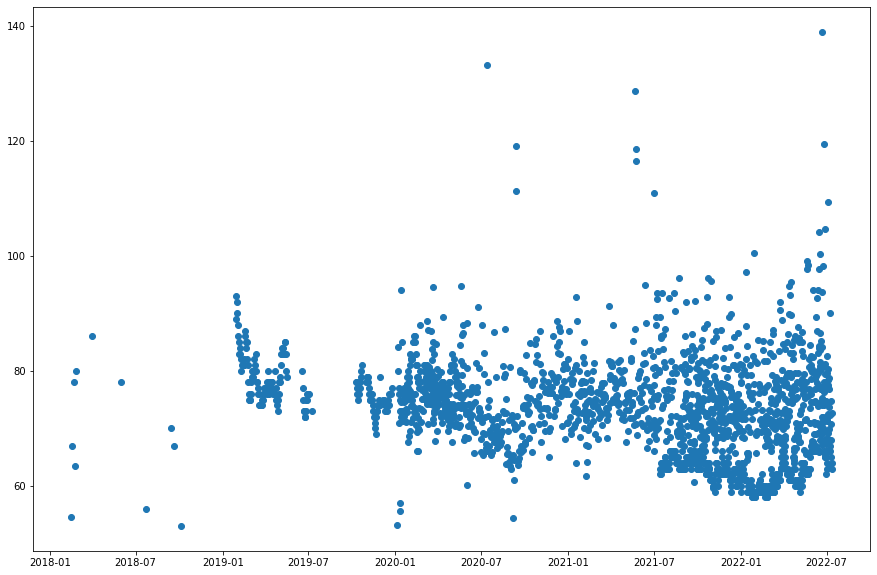

In [234]:
# Revisamos la distribución del ritmo cardiaco a través de un ScatterPlot 
plt.scatter(meditions.Date, meditions.HeartRate)

<AxesSubplot:xlabel='Date', ylabel='HeartRate'>

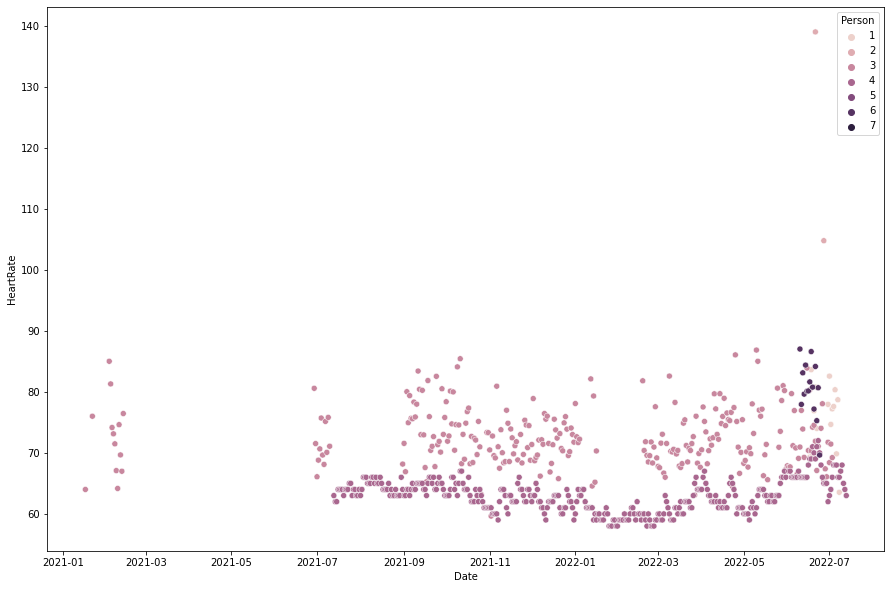

In [250]:
# Para una visualización más clara, visulizamos los datos desde 2021 y sin el individuo 8, que domina la gráficas por la cantidad de los datos

sns.scatterplot(x="Date", y="HeartRate", data = meditions[(meditions['Date'].dt.year>2020) & (meditions['Person']<8)], hue="Person")

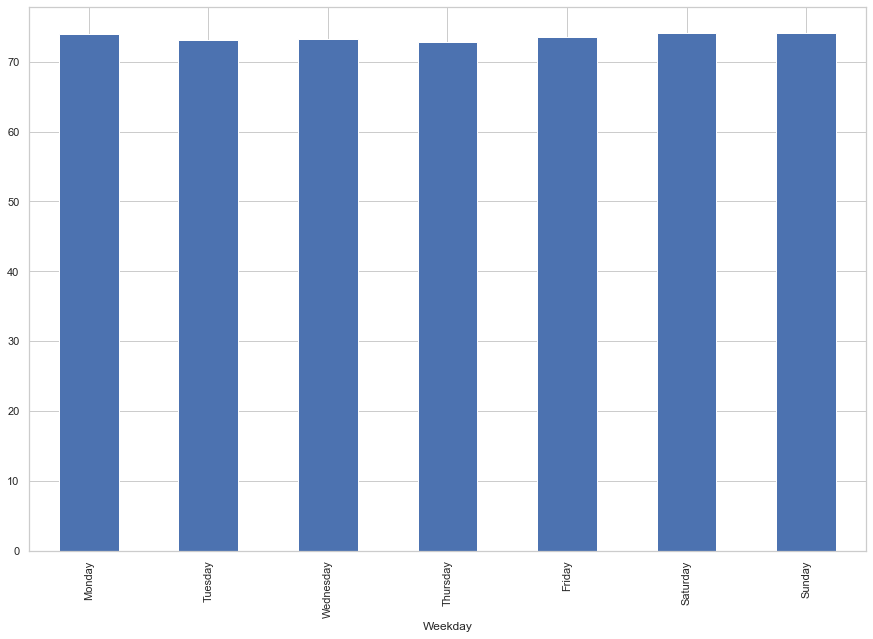

In [276]:
meditions['Weekday'] = meditions['Date'].dt.weekday
data = meditions.groupby(['Weekday'])['HeartRate'].mean()
data.plot(kind='bar', x=meditions['HeartRate'])
plt.xticks(index, labels)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

<AxesSubplot:xlabel='Weekday', ylabel='HeartRate'>

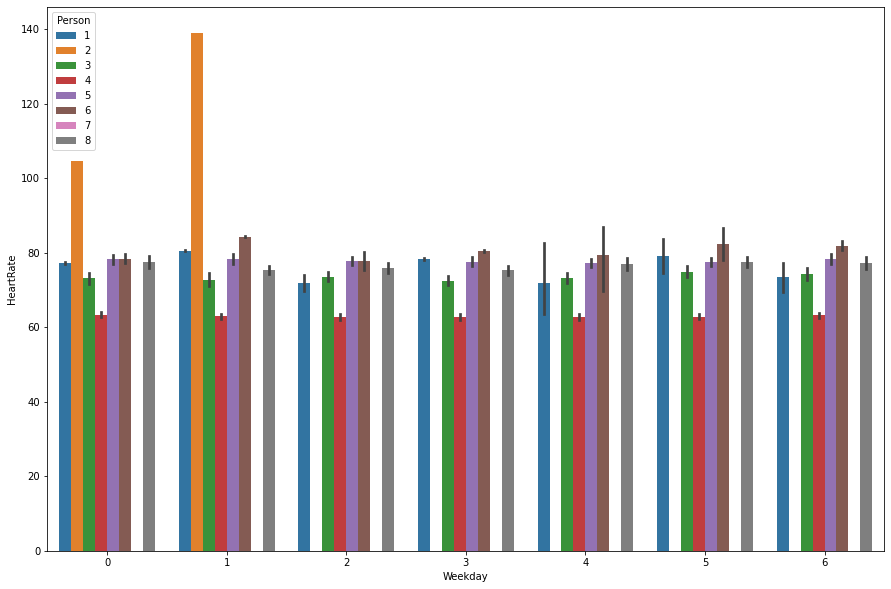

In [255]:
sns.barplot(x="Weekday", hue="Person", y= 'HeartRate', data=meditions)

<AxesSubplot:xlabel='Person', ylabel='HeartRate'>

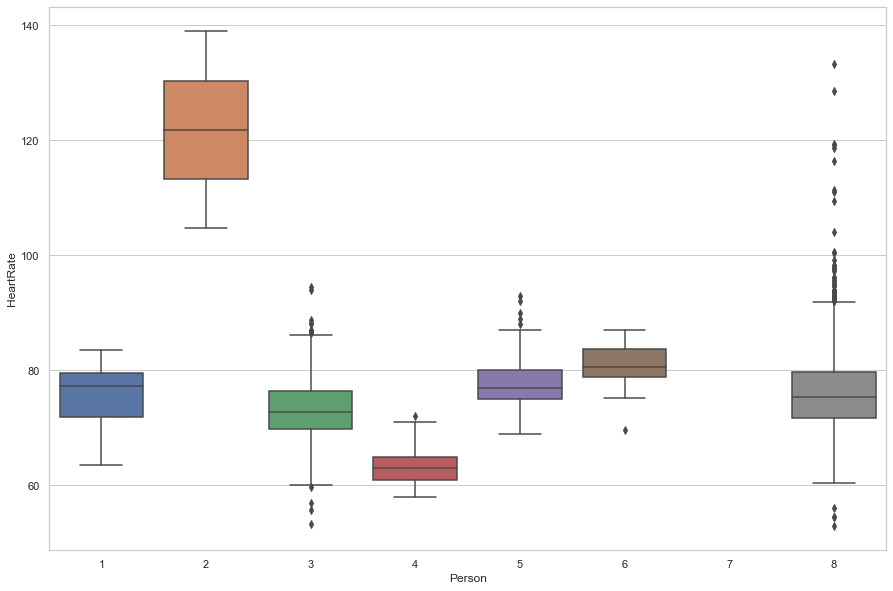

In [267]:
sns.boxplot(x="Person", y="HeartRate", data=meditions)

In [278]:
meditions.groupby(['Person'])['HeartRate'].mean()

Person
1     75.764759
2    121.852684
3     73.456163
4     62.915068
5     77.797753
6     80.542682
7           NaN
8     76.531631
Name: HeartRate, dtype: float64

`Observaciones`

- Por el primer gráfico podemos ver que la frecuencia en la recolección de datos ha aumentado en los últimos 2 años. A medida que hay más datos vemos más cantidad de medidciones sobre las 80 pulsaciones por minuto
- Los martes son los días con el promedio de latidos por minutos más bajos, mientras que los jueves es el día con valores más altos.  Sine mbargo, en general la distribución por días es bastante constante
- Por último vemos que hasya bastante variabilidad en la distribución de cada persona, sin embargo, los pocos datos recoelctados de algunos individuos hacen que sus datos se vea más extremos (persona 1, 2 y 6)
- Vemos que la persona 4 es la que cuenta con una frecuenci cardiaca más baja, lo que podría indicar una rutina con pocos picos de actividad o estrés. 
- Por otro lado el individuo 6 es quien tiene una media más alta de frecuencia cardiaca, sin embargo, estos datos no son concluyentes al incluir tan solo 2 semanas 
- Vemos entonces que las personas con más datos tienden a una misma tendencia central hacia los 75 latidos por minuto.

### Calorias

Aplicamos las mismas técnicas gráficas de las variables anteriores para análisis estadístico de los datos de calorías.

<AxesSubplot:xlabel='Date', ylabel='ActiveEnergyBurned'>

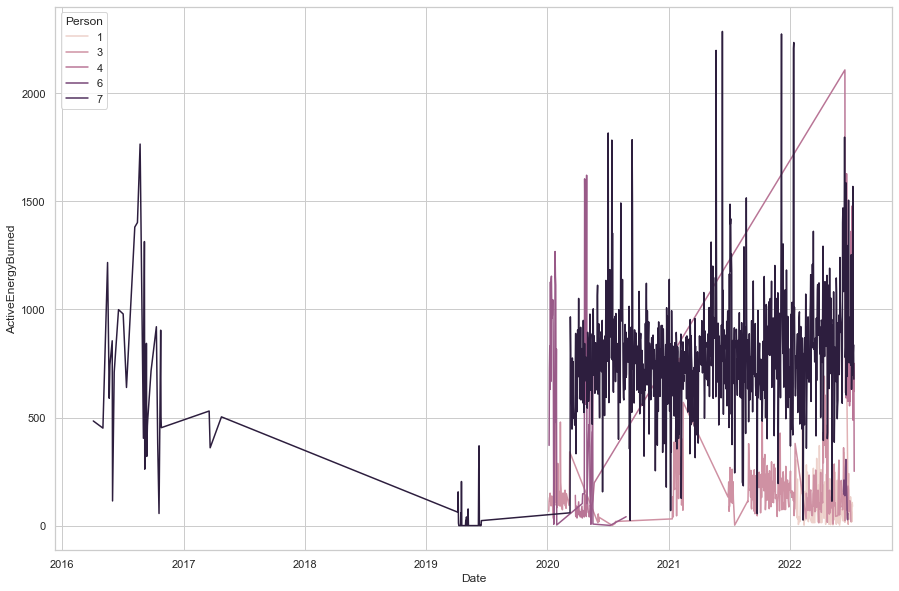

In [268]:
sns.lineplot(x='Date' , y='ActiveEnergyBurned' , data=meditions, hue= 'Person')

<AxesSubplot:xlabel='Date', ylabel='ActiveEnergyBurned'>

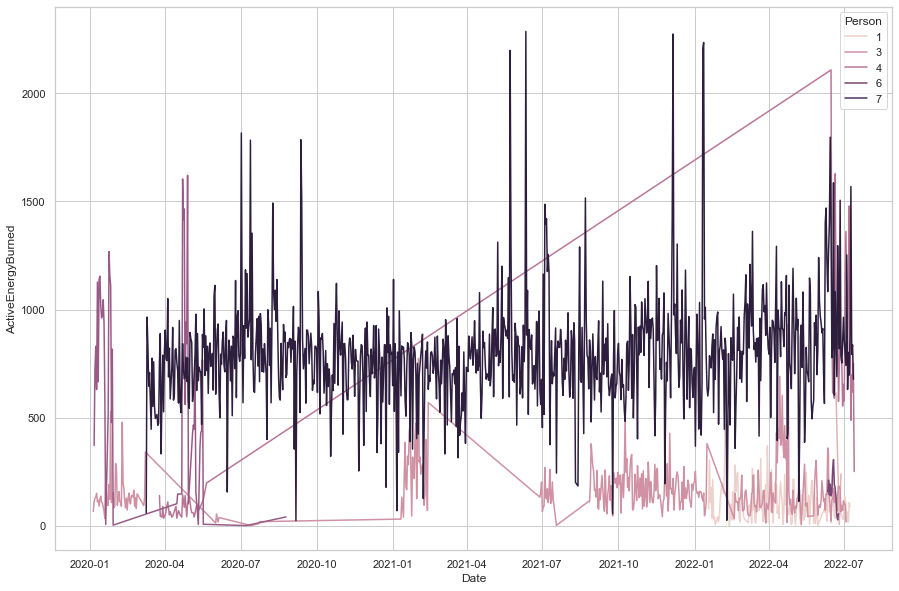

In [270]:
#Vemos que hay mucho espacio sin información antes de 2020 por lo que delimitamos los datos con esta fecha

sns.lineplot(x='Date' , y='ActiveEnergyBurned' , data=meditions[meditions['Date'].dt.year > 2019], hue= 'Person')

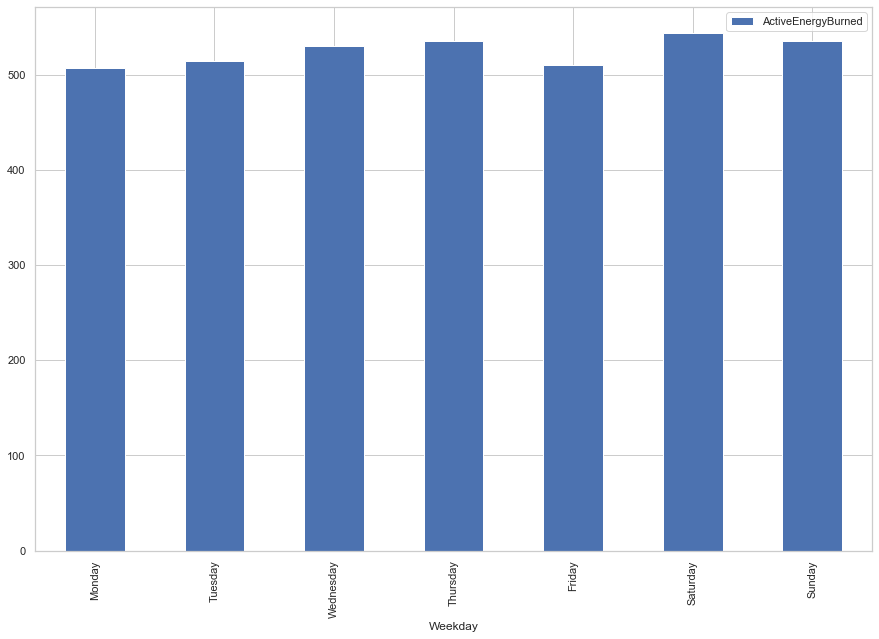

In [272]:
data = meditions.groupby(['Weekday']).agg({'ActiveEnergyBurned':'mean'})
data.plot(kind='bar')
plt.xticks(index, labels)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [273]:
data

,ActiveEnergyBurned
Weekday,
0,507.286123
1,514.082639
2,529.912196
3,535.649978
4,509.543027
5,543.799957
6,535.002052


<AxesSubplot:xlabel='Weekday', ylabel='ActiveEnergyBurned'>

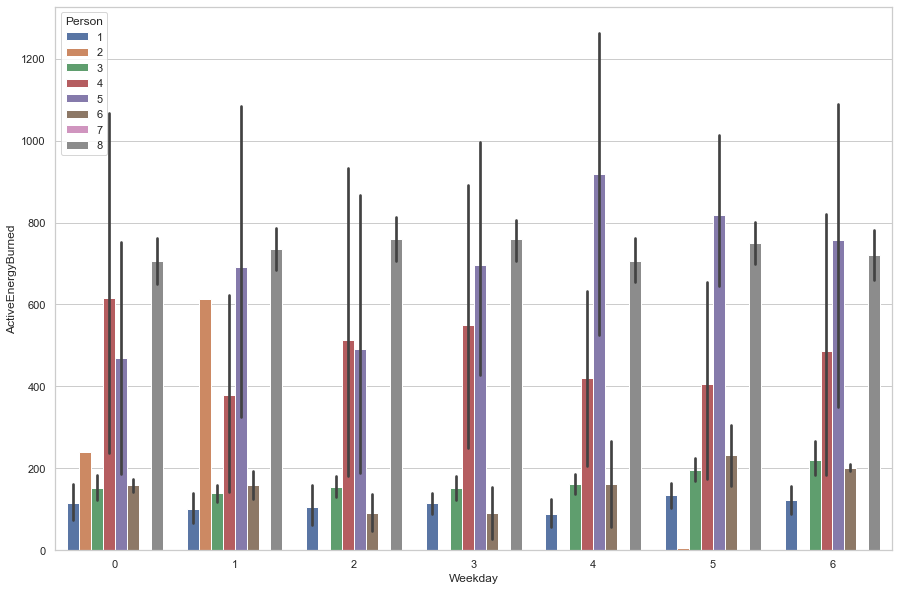

In [274]:
sns.barplot(x="Weekday", hue="Person", y= 'ActiveEnergyBurned', data=meditions)

<AxesSubplot:xlabel='Person', ylabel='ActiveEnergyBurned'>

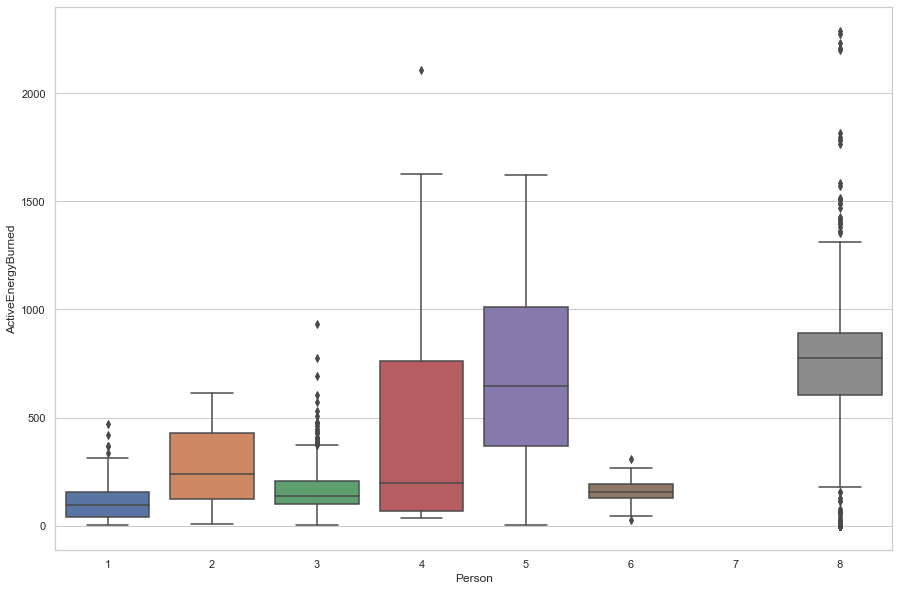

In [275]:
sns.boxplot(x="Person", y="ActiveEnergyBurned", data=meditions)

`Observaciones`

- A partir del primer gráfico podemos notar que cada persona tiene un patrón de quema de calorías que tiende siempre a una media personal, que varia mucho entre individuo( ej: persona 8 cercana a las 800 calorias, mientras que las personas 1,2,3 están por las 300 calorías)
- Sábado y domingo son los días en que se queman más calorías de forma activa, sine mabrgo el jueves es sorpreivamente un día muy activo para los sujetos de nuestro estudio
- Nuevamente el sujeto 8 presenta mucha variabilidad en  la distribución de sus datos, por lo cual es dificil identificar patrones 
- EL sujeto 5 también tiene un amplio rango de distribuciónd e datos sin embargo no tiene outliers identifiados, con lo cual podríamos inferrir que lleva un rutina donde tiene días muya ctivos y otros de descanso. 